In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import sklearn

In [3]:
# sample_df=pd.read_csv("./sample.csv")
# test_df=pd.read_csv("./test.csv/test.csv")

In [2]:
train_df = pd.read_csv("./train.csv/train.csv")
test_df = pd.read_csv("./test.csv/test.csv")


In [4]:
train_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [5]:
test_df.head() #it has all column except the one that we need too predict

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


### Lets analyse the training set

In [6]:
train_df.shape

(69999, 172)

In [7]:
nullcount=train_df.isna().sum()/len(train_df.id)
nullcount[nullcount>0.7].sort_values(ascending=False)  #in these fields around 75% values are null

date_of_last_rech_data_6    0.749025
count_rech_2g_6             0.749025
fb_user_6                   0.749025
night_pck_user_6            0.749025
arpu_2g_6                   0.749025
arpu_3g_6                   0.749025
count_rech_3g_6             0.749025
av_rech_amt_data_6          0.749025
max_rech_data_6             0.749025
total_rech_data_6           0.749025
arpu_3g_7                   0.744782
count_rech_2g_7             0.744782
fb_user_7                   0.744782
count_rech_3g_7             0.744782
date_of_last_rech_data_7    0.744782
av_rech_amt_data_7          0.744782
night_pck_user_7            0.744782
max_rech_data_7             0.744782
total_rech_data_7           0.744782
arpu_2g_7                   0.744782
arpu_2g_8                   0.736896
date_of_last_rech_data_8    0.736896
night_pck_user_8            0.736896
max_rech_data_8             0.736896
arpu_3g_8                   0.736896
total_rech_data_8           0.736896
av_rech_amt_data_8          0.736896
c

In [8]:
moreNullCols=nullcount[nullcount>0.7].sort_values(ascending=False).index
train_df[moreNullCols] #seems the record is full NA or information available 

,date_of_last_rech_data_6,count_rech_2g_6,fb_user_6,night_pck_user_6,arpu_2g_6,arpu_3g_6,count_rech_3g_6,av_rech_amt_data_6,max_rech_data_6,total_rech_data_6,...,arpu_2g_8,date_of_last_rech_data_8,night_pck_user_8,max_rech_data_8,arpu_3g_8,total_rech_data_8,av_rech_amt_data_8,count_rech_3g_8,count_rech_2g_8,fb_user_8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6/25/2014,7.0,1.0,0.0,0.00,0.00,0.0,175.0,25.0,7.0,...,0.00,8/20/2014,0.0,25.0,0.00,6.0,142.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.00,8/21/2014,0.0,17.0,0.00,1.0,17.0,0.0,1.0,1.0
69995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69997,6/17/2014,0.0,1.0,0.0,150.67,150.67,1.0,179.0,179.0,1.0,...,122.07,8/14/2014,0.0,145.0,122.08,1.0,145.0,1.0,0.0,1.0


In [9]:
train_df[~train_df.date_of_last_rech_data_6.isna()][moreNullCols]

,date_of_last_rech_data_6,count_rech_2g_6,fb_user_6,night_pck_user_6,arpu_2g_6,arpu_3g_6,count_rech_3g_6,av_rech_amt_data_6,max_rech_data_6,total_rech_data_6,...,arpu_2g_8,date_of_last_rech_data_8,night_pck_user_8,max_rech_data_8,arpu_3g_8,total_rech_data_8,av_rech_amt_data_8,count_rech_3g_8,count_rech_2g_8,fb_user_8
4,6/25/2014,7.0,1.0,0.0,0.00,0.00,0.0,175.0,25.0,7.0,...,0.00,8/20/2014,0.0,25.0,0.00,6.0,142.0,0.0,6.0,1.0
7,6/20/2014,1.0,1.0,0.0,0.00,0.00,0.0,198.0,198.0,1.0,...,0.00,8/20/2014,0.0,198.0,0.00,1.0,198.0,0.0,1.0,1.0
10,6/29/2014,1.0,1.0,0.0,14.38,202.27,0.0,98.0,98.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,6/16/2014,1.0,1.0,0.0,164.75,0.00,0.0,154.0,154.0,1.0,...,28.80,8/2/2014,0.0,154.0,0.00,1.0,154.0,0.0,1.0,1.0
16,6/19/2014,0.0,1.0,0.0,122.07,122.58,1.0,145.0,145.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69984,6/27/2014,1.0,1.0,0.0,186.03,186.03,2.0,449.0,152.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69989,6/30/2014,1.0,1.0,1.0,87.68,80.53,1.0,99.0,91.0,2.0,...,83.58,8/26/2014,0.0,91.0,91.89,1.0,91.0,1.0,0.0,1.0
69993,6/25/2014,9.0,1.0,0.0,3.65,0.58,0.0,319.0,149.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69997,6/17/2014,0.0,1.0,0.0,150.67,150.67,1.0,179.0,179.0,1.0,...,122.07,8/14/2014,0.0,145.0,122.08,1.0,145.0,1.0,0.0,1.0


In [10]:
[i for i in train_df.columns]

['id',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 

In [11]:
#TRYING to identify some of the variables which is important in terms of revenue generation as per the given businesss perspective
SelectedCols=['arpu_6','arpu_7','arpu_8','onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8','offnet_mou_6',
    'offnet_mou_7',
     'offnet_mou_8',
     'roam_ic_mou_6',
     'roam_ic_mou_7',
     'roam_ic_mou_8',
     'roam_og_mou_6',
     'roam_og_mou_7',
     'roam_og_mou_8','std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8','total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8','date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8','night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'aon',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g']

In [12]:
train_df[SelectedCols]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,15.760,410.924,329.136,0.00,7.36,10.93,0.00,488.46,381.64,14.96,...,0,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00
69995,160.083,289.129,265.772,116.54,196.46,232.63,49.53,96.28,48.06,0.00,...,0,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00
69996,372.088,258.374,279.782,77.13,68.44,78.44,335.54,227.94,263.84,0.00,...,0,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00
69997,238.575,245.414,145.062,14.01,7.64,6.71,30.34,16.68,12.56,25.06,...,0,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97


In [13]:
any(train_df.id.value_counts()>1)  #meaning no duplicate customer entry

False

In [14]:
train_df.circle_id.value_counts() #meaning only 1 circle information so it can be dropped

109    69999
Name: circle_id, dtype: int64

In [15]:
# train_df=train_df.drop(columns=['circle_id'])

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [17]:
allDates=train_df.select_dtypes(include='object') # using this we get the 
allDates
# list of all date columns we can transform it into numeric one in order to perform any calculation on top of it

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [18]:
#in order to compute the days equivalent for this data we need some reference point ,
# since the data is of 2014 and upto august we take september-2014 as the reference point
import datetime
dateRef=datetime.datetime(2014,9,1)
dateRef

datetime.datetime(2014, 9, 1, 0, 0)

In [19]:
for i in allDates.columns:
   allDates[i]=allDates[i].apply(lambda x : datetime.datetime.strptime(x,'%m/%d/%Y') if isinstance(x,str) else x)
allDates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   last_date_of_month_6      69999 non-null  datetime64[ns]
 1   last_date_of_month_7      69600 non-null  datetime64[ns]
 2   last_date_of_month_8      69266 non-null  datetime64[ns]
 3   date_of_last_rech_6       68898 non-null  datetime64[ns]
 4   date_of_last_rech_7       68765 non-null  datetime64[ns]
 5   date_of_last_rech_8       67538 non-null  datetime64[ns]
 6   date_of_last_rech_data_6  17568 non-null  datetime64[ns]
 7   date_of_last_rech_data_7  17865 non-null  datetime64[ns]
 8   date_of_last_rech_data_8  18417 non-null  datetime64[ns]
dtypes: datetime64[ns](9)
memory usage: 4.8 MB


In [20]:
train_df.drop(columns=allDates.columns,inplace=True)
train_df=pd.concat([train_df,allDates],axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to date_of_last_rech_data_8
dtypes: datetime64[ns](9), float64(135), int64(28)
memory usage: 91.9 MB


In [21]:
train_df.select_dtypes(include='object').head() #now no ddatatypes with object type

""
0
1
2
3
4


In [22]:
#Let change the date to the numericc format takking the reference point now
for i in allDates.columns:
    allDates[i]=allDates[i].apply(lambda x: (dateRef-x).days if not pd.isna(x) else np.nan)

In [23]:
allDates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   last_date_of_month_6      69999 non-null  int64  
 1   last_date_of_month_7      69600 non-null  float64
 2   last_date_of_month_8      69266 non-null  float64
 3   date_of_last_rech_6       68898 non-null  float64
 4   date_of_last_rech_7       68765 non-null  float64
 5   date_of_last_rech_8       67538 non-null  float64
 6   date_of_last_rech_data_6  17568 non-null  float64
 7   date_of_last_rech_data_7  17865 non-null  float64
 8   date_of_last_rech_data_8  18417 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 4.8 MB


In [24]:
train_df.drop(columns=allDates.columns,inplace=True)
train_df=pd.concat([train_df,allDates],axis=1)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to date_of_last_rech_data_8
dtypes: float64(143), int64(29)
memory usage: 91.9 MB


In [25]:
#now lets see if the same values are available in all rows for any colums
constant_cols_df=pd.DataFrame()
constant_cols_df['ColumnsName']=train_df.columns
total_rows=len(train_df.id)
mostcommon_perc=[]
for i in train_df.columns:
    mostcommon_perc.append(round(train_df[i].value_counts().max()/total_rows,3))
constant_cols_df['similaritymax']=mostcommon_perc
constant_cols_df.index=constant_cols_df.ColumnsName

In [26]:
constant_cols_df.drop(columns=['ColumnsName'],inplace=True)

In [27]:
constant_cols_df[constant_cols_df['similaritymax']>0.9] ##in this column 90 % of the vlaue are similar so its 
# not actually giving us much information to be used so we can get rid of these colums too

,similaritymax
ColumnsName,
circle_id,1.000
loc_og_t2o_mou,0.990
std_og_t2o_mou,0.990
loc_ic_t2o_mou,0.990
std_og_t2c_mou_6,0.960
std_og_t2c_mou_7,0.962
std_og_t2c_mou_8,0.947
isd_og_mou_6,0.913
isd_og_mou_7,0.917


In [28]:
train_df.drop(columns=constant_cols_df[constant_cols_df['similaritymax']>0.90].index,inplace=True)

In [29]:
#aalso since the id is not duplicated it wont assist us in doing some grouping and all so we can get rid of thaat too
train_df.drop(columns=['id'],inplace=True)

In [30]:
train_df.shape

(69999, 144)

In [31]:
train_df=train_df.fillna(value=-1)

In [32]:
#Now lets try to create some base model out of whatever feature we have and then will continue further
from sklearn.linear_model import LogisticRegression
lg_model=LogisticRegression()
lg_model.fit(train_df.drop(columns=['churn_probability']),train_df['churn_probability'])

C:\Users\prason.ghimire\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
test_df.info() ## here also 9 object are of datetimee letss convert it to numeric format using the same reference date method
# we have used while preprocessing the training set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


In [34]:
allDates_test=test_df.select_dtypes(include='object')
for i in allDates_test.columns:
   allDates_test[i]=allDates_test[i].apply(lambda x : datetime.datetime.strptime(x,'%m/%d/%Y') if isinstance(x,str) else x)
test_df.drop(columns=allDates_test.columns,inplace=True)
test_df=pd.concat([test_df,allDates_test],axis=1)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to date_of_last_rech_data_8
dtypes: datetime64[ns](9), float64(135), int64(27)
memory usage: 39.1 MB


In [35]:
for i in test_df.select_dtypes(include='datetime').columns:
    test_df[i]=test_df[i].apply(lambda x: (dateRef-x).days if not pd.isna(x) else np.nan)

In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to date_of_last_rech_data_8
dtypes: float64(143), int64(28)
memory usage: 39.1 MB


In [37]:
# test_df=test_df.merge(sample_df,on='id',how='inner') # incorrect move

In [38]:
test_df.drop(columns=constant_cols_df[constant_cols_df['similaritymax']>0.90].index,inplace=True)
#aalso since the id is not duplicated it wont assist us in doing some grouping and all so we can get rid of thaat too
test_df.drop(columns=['id'],inplace=True)

In [39]:
test_df.shape #now that the shape looks compatible we can predict from the test dataset

(30000, 143)

In [40]:
#lastly lets fill the nan value with the same -1 value we have used for the train set
test_df=test_df.fillna(value=-1)

In [41]:
lg_model_predict=lg_model.predict(test_df)

In [42]:
np.unique(lg_model_predict,return_counts=True)

(array([0, 1], dtype=int64), array([29002,   998], dtype=int64))

In [43]:
lg_model_predict_x=lg_model.predict(train_df.drop(columns=['churn_probability']))

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,precision_score,recall_score

In [45]:
confusion_matrix(y_true=train_df['churn_probability'],y_pred=lg_model_predict_x)

array([[62205,   662],
       [ 5497,  1635]], dtype=int64)

In [46]:
accuracy_score(y_true=train_df['churn_probability'],y_pred=lg_model_predict_x)  #However this looks rather misleading result as tall the data here is
#belonging to the non churning probabilitiy

0.9120130287575536

<BarContainer object of 2 artists>

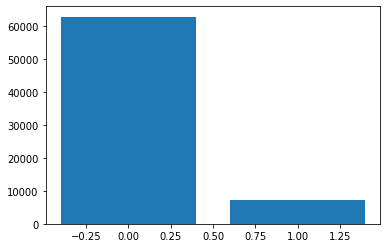

In [47]:
plt.bar(train_df['churn_probability'].value_counts().index,train_df['churn_probability'].value_counts().values)

## Analysis 2 

In [206]:
# # Since the data to validate in the test data frame is not balance we will merge the dataset and create test and train df
# train_df=pd.read_csv('./train.csv/train.csv')
# test_df=pd.read_csv("./test.csv/test.csv")
# test_df=test_df.merge(sample_df,on='id',how='inner')

In [207]:
# train_df.shape

(69999, 172)

In [208]:
# test_df.shape

(30000, 172)

In [209]:
# total_df=pd.concat([train_df,test_df])

In [210]:
# total_df.shape

(99999, 172)

<BarContainer object of 2 artists>

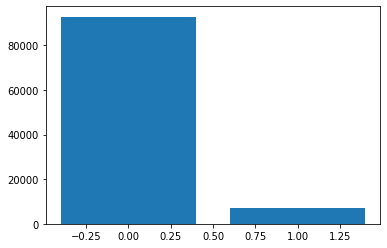

In [218]:
# plt.bar(total_df['churn_probability'].value_counts().index,total_df['churn_probability'].value_counts().values)

In [216]:
# from sklearn.model_selection import train_test_split

In [228]:
#lets create a balanced set for the train_teest split 
# x_train,x_test,y_train,y_test=train_test_split(total_df.drop(columns=['churn_probability']),total_df['churn_probability'],stratify=total_df['churn_probability'],shuffle=True,train_size=.8)

In [232]:
# #Now let train on the dataset using above method and see the performance
# test_df=x_test
# allDates_test=test_df.select_dtypes(include='object')
# for i in allDates_test.columns:
#    allDates_test[i]=allDates_test[i].apply(lambda x : datetime.datetime.strptime(x,'%m/%d/%Y') if isinstance(x,str) else x)
# test_df.drop(columns=allDates_test.columns,inplace=True)
# test_df=pd.concat([test_df,allDates_test],axis=1)
# test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 16816 to 15810
Columns: 171 entries, id to date_of_last_rech_data_8
dtypes: datetime64[ns](9), float64(135), int64(27)
memory usage: 26.2 MB


In [233]:
# for i in test_df.select_dtypes(include='datetime').columns:
#     test_df[i]=test_df[i].apply(lambda x: (dateRef-x).days if not pd.isna(x) else np.nan)
# test_df.drop(columns=constant_cols_df[constant_cols_df['similaritymax']>0.90].index,inplace=True)
# #aalso since the id is not duplicated it wont assist us in doing some grouping and all so we can get rid of thaat too
# test_df.drop(columns=['id'],inplace=True)
# test_df.shape

(20000, 143)

In [235]:
# #lastly lets fill the nan value with the same -1 value
# test_df=test_df.fillna(value=-1)

In [ ]:
#Now same thing for the train set too

In [236]:
# train_df=x_train
# allDates_train=train_df.select_dtypes(include='object')
# for i in allDates_train.columns:
#    allDates_train[i]=allDates_train[i].apply(lambda x : datetime.datetime.strptime(x,'%m/%d/%Y') if isinstance(x,str) else x)
# train_df.drop(columns=allDates_train.columns,inplace=True)
# train_df=pd.concat([train_df,allDates_train],axis=1)
# train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79999 entries, 17584 to 25016
Columns: 171 entries, id to date_of_last_rech_data_8
dtypes: datetime64[ns](9), float64(135), int64(27)
memory usage: 105.0 MB


In [237]:
# for i in train_df.select_dtypes(include='datetime').columns:
#     train_df[i]=train_df[i].apply(lambda x: (dateRef-x).days if not pd.isna(x) else np.nan)
# train_df.drop(columns=constant_cols_df[constant_cols_df['similaritymax']>0.90].index,inplace=True)
# #aalso since the id is not duplicated it wont assist us in doing some grouping and all so we can get rid of thaat too
# train_df.drop(columns=['id'],inplace=True)
# train_df=train_df.fillna(value=-1)
# train_df.shape

(79999, 143)

In [240]:
# lg_model1 = LogisticRegression()
# lg_model1.fit(train_df,y_train)

C:\Users\prason.ghimire\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [241]:
# y_test_predict=lg_model1.predict(test_df)

In [242]:
# confusion_matrix(y_true=y_test,y_pred=y_test_predict)

array([[18479,    95],
       [ 1334,    92]], dtype=int64)

In [244]:
# accuracy_score(y_true=y_test,y_pred=y_test_predict) # this is better view on the actual prediction however the model seems
# # to not perform very well because the most of the true value are predicted false. seemss like its overtrained for the value
# # of being non churn

0.92855

## Analysis 3

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
y_train=train_df['churn_probability']
train_df=train_df.drop(columns=['churn_probability'])

In [51]:
#Lets try to train the new train and tesst set with the top selectedd feature using the RFE
from sklearn.feature_selection import RFE

In [52]:
lg_model2= LogisticRegression()
rfe=RFE(estimator=lg_model2,n_features_to_select=100)
rfe.fit(train_df,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=100)

In [53]:
selected100=rfe.feature_names_in_[rfe.support_]

In [54]:
lg_model3 = LogisticRegression()
lg_model3.fit(train_df[selected100],y_train)

LogisticRegression()

In [55]:
y_test_predict=lg_model3.predict(test_df[selected100])

In [57]:
lg_model_predict_x=lg_model3.predict(train_df[selected100])

In [58]:
confusion_matrix(y_true=y_train,y_pred=lg_model_predict_x)

array([[62209,   658],
       [ 5451,  1681]], dtype=int64)

In [59]:
accuracy_score(y_true=y_train,y_pred=lg_model_predict_x) #seems like what 143 parameters can do, same things is achieved using the 100 parameters too

0.9127273246760668

In [ ]:
#lets see what is the optimum number of features we can select without losing much on accuracy

In [60]:
def getAccuracyOnParams(paramsToChose):
    lg_model2= LogisticRegression()
    rfe=RFE(estimator=lg_model2,n_features_to_select=paramsToChose)
    rfe.fit(train_df,y_train)
    selected100=rfe.feature_names_in_[rfe.support_]
    lg_model3 = LogisticRegression()
    lg_model3.fit(train_df[selected100],y_train)
    y_train_predict=lg_model3.predict(train_df[selected100])
    return {'param':paramsToChose,'acc_score':accuracy_score(y_true=y_train,y_pred=y_train_predict)}


[getAccuracyOnParams(i) for i in [10,20,50,80,100,120,150]]
    

[{'param': 10, 'acc_score': 0.9300990014143059},
 {'param': 20, 'acc_score': 0.9246417805968656},
 {'param': 50, 'acc_score': 0.9148130687581251},
 {'param': 80, 'acc_score': 0.9139273418191688},
 {'param': 100, 'acc_score': 0.9127273246760668},
 {'param': 120, 'acc_score': 0.9119558850840727},
 {'param': 150, 'acc_score': 0.9120130287575536}]

In [285]:
#  seems, with the top 10-20 features also the model is performing well enough, but lets dig further and see

In [61]:
#Lets see what are the top features.
rfe=RFE(lg_model2,n_features_to_select=10)
rfe.fit(train_df,y_train)
selected10=rfe.feature_names_in_[rfe.support_]
selected10

array(['std_ic_t2f_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_6', 'total_rech_num_8', 'total_rech_data_8',
       'count_rech_3g_8', 'sachet_2g_8', 'fb_user_8'], dtype=object)

In [68]:
rfe=RFE(lg_model2,n_features_to_select=20)
rfe.fit(train_df,y_train)
selected20=rfe.feature_names_in_[rfe.support_]
selected20

array(['roam_og_mou_6', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'total_og_mou_6',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_6',
       'total_rech_num_8', 'total_rech_data_8', 'count_rech_2g_8',
       'count_rech_3g_8', 'sachet_2g_8', 'fb_user_8',
       'date_of_last_rech_7'], dtype=object)

In [78]:
rfe=RFE(lg_model2,n_features_to_select=100)
rfe.fit(train_df,y_train)
selected100=rfe.feature_names_in_[rfe.support_]
selected100

array(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_8',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_7',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_mou_7', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_7',
       'std_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'total_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std

## Analysis 4

In [69]:
# Given that the cost for the business to acquire the new customer is more than to retain the existing one, model with type-2 error
# i.e. tagging the customer that they will not churn even if they are at the risk of being churn will be costlier for the
# bussiness so lets try to change the prediction threshod and see if it has any impact on the accuracy

In [303]:
#Lets begin our analysis with the top 20 feature being selected by the RFE

In [74]:
lg_model4 = LogisticRegression()
lg_model4.fit(train_df[selected10],y_train)
y_test_predict=lg_model4.predict_proba(test_df[selected10])

In [75]:
y_train_predict=lg_model4.predict_proba(train_df[selected10])
threshold_df=pd.DataFrame(y_train.values,columns=['orig_y'])
#Now lets test the different threshold value to know if some threshold will be performing better
def predictOnThreshold(threshold):
    threshold_df[f"with_{threshold}"]=[1 if x[1]>threshold else 0 for x in y_train_predict]

for i in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    predictOnThreshold(i)

In [77]:
for i in threshold_df.columns:
    print(accuracy_score(y_train,threshold_df[i]),f"<- for {i}")
#here 0.6 threshold value proves to be better when predicting on the training set let see if its showing the same behaviour 
# on the test set or its overfitted here

1.0 <- for orig_y
0.926456092229889 <- for with_0.2
0.9287275532507607 <- for with_0.3
0.9293704195774225 <- for with_0.4
0.9300990014143059 <- for with_0.5
0.9307275818225975 <- for with_0.6
0.930156145087787 <- for with_0.7
0.921341733453335 <- for with_0.8
0.905227217531679 <- for with_0.9


In [79]:
lg_model4 = LogisticRegression()
lg_model4.fit(train_df[selected20],y_train)
y_train_predict=lg_model4.predict_proba(train_df[selected20])
threshold_df=pd.DataFrame(y_train.values,columns=['orig_y'])
#Now lets test the different threshold value to know if some threshold will be performing better
def predictOnThreshold(threshold):
    threshold_df[f"with_{threshold}"]=[1 if x[1]>threshold else 0 for x in y_train_predict]

for i in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    predictOnThreshold(i)

In [80]:
for i in threshold_df.columns:
    print(accuracy_score(y_train,threshold_df[i]),f"<- for {i}")

1.0 <- for orig_y
0.8778553979342562 <- for with_0.2
0.921884598351405 <- for with_0.3
0.9295275646794954 <- for with_0.4
0.9246417805968656 <- for with_0.5
0.915455935084787 <- for with_0.6
0.9090987014100201 <- for with_0.7
0.9063986628380405 <- for with_0.8
0.8986699809997286 <- for with_0.9


In [81]:
# with this analysis 0.4 threshold value proves to be better when predicting

In [82]:
lg_model4 = LogisticRegression()
lg_model4.fit(train_df[selected100],y_train)
y_train_predict=lg_model4.predict_proba(train_df[selected100])
threshold_df=pd.DataFrame(y_train.values,columns=['orig_y'])
#Now lets test the different threshold value to know if some threshold will be performing better
def predictOnThreshold(threshold):
    threshold_df[f"with_{threshold}"]=[1 if x[1]>threshold else 0 for x in y_train_predict]

for i in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    predictOnThreshold(i)

In [83]:
for i in threshold_df.columns:
    print(accuracy_score(y_train,threshold_df[i]),f"<- for {i}")

1.0 <- for orig_y
0.8816268803840055 <- for with_0.2
0.9194274203917199 <- for with_0.3
0.9193988485549793 <- for with_0.4
0.9127273246760668 <- for with_0.5
0.9066700952870755 <- for with_0.6
0.9019271703881484 <- for with_0.7
0.8996985671223875 <- for with_0.8
0.898855697938542 <- for with_0.9


In [ ]:
#out of these  10 feature selected are doing the better than 20 or 100 features

## Analysis 5

In [334]:
# Lets try analysing the same scenario with the relatively complex model like random forest to see if theere is some better
# result in prediction, we will use the same set of 20 important feature selected using RFE

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
train_df.shape

(69999, 143)

In [97]:
rf_model1=RandomForestClassifier(min_samples_split=100) #just setting one hyper paramter as of now and keeping all as default
rf_model1.fit(train_df[selected20],y_train)

RandomForestClassifier(min_samples_split=100)

In [98]:
y_train_pred_rf=rf_model1.predict(train_df[selected20])

In [99]:
print(accuracy_score(y_train,y_train_pred_rf)) #seems to be a slight increase but not much significantly here the accuracy rises
# when 100 features were selected than that of 20 and 20 was giving more accuracy than that of top 10 so we will take this as best one

0.9437563393762768


In [100]:
#same thing with top 100 feature to see if something new will come up
rf_model1=RandomForestClassifier(min_samples_split=100) #just setting one hyper paramter as of now and keeping all as default
rf_model1.fit(train_df[selected100],y_train)
y_train_pred_rf=rf_model1.predict(train_df[selected100])
print(accuracy_score(y_train,y_train_pred_rf)) #seems to be a slight increase than using only 10 but not much significantly

0.945456363662338


In [157]:
# lets tune it with some set of parameter and find the best one if availble, this is very long running code so commenting for now
params={"n_estimators":[10,20,50,80],
       "min_samples_split":[100,500,750,1000],
       "min_samples_leaf":[100,500,750,1000]}
from sklearn.model_selection import GridSearchCV
rf_model2=RandomForestClassifier()
gs_cv=GridSearchCV(estimator=rf_model2,param_grid=params,scoring='accuracy',n_jobs=-1,verbose=3)
gs_cv.fit(train_df[selected100],y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': [100, 500, 750, 1000],
                         'min_samples_split': [100, 500, 750, 1000],
                         'n_estimators': [10, 20, 50, 80]},
             scoring='accuracy', verbose=3)

In [158]:
gs_cv.best_score_

0.9414848795322115

In [159]:
gs_cv.best_estimator_

RandomForestClassifier(min_samples_leaf=100, min_samples_split=100,
                       n_estimators=50)

In [160]:
y_test_pred_rf=gs_cv.best_estimator_.predict(train_df[selected100])
print(accuracy_score(y_train,y_test_pred_rf))

0.9423563193759911


In [178]:
y_test_pred_rf=gs_cv.best_estimator_.predict_proba(train_df[selected100])
threshold_df=pd.DataFrame(y_train.values,columns=['orig_y'])
#Now lets test the different threshold value to know if some threshold will be performing better
def predictOnThreshold(threshold):
    threshold_df[f"with_{threshold}"]=[1 if x[1]>threshold else 0 for x in y_test_pred_rf]

for i in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    predictOnThreshold(i)
for i in threshold_df.columns:
    print(accuracy_score(y_train,threshold_df[i]),f"<- for {i}")

1.0 <- for orig_y
0.9329561850883584 <- for with_0.2
0.9405420077429678 <- for with_0.3
0.9421848883555479 <- for with_0.4
0.9423563193759911 <- for with_0.5
0.9390991299875713 <- for with_0.6
0.9334419063129473 <- for with_0.7
0.9283561193731339 <- for with_0.8
0.908655837940542 <- for with_0.9


In [349]:
#Lets try using these hhyperparamters combination seleccted and train model with top100 feature to see what we will get

In [102]:
rf_model2=RandomForestClassifier(n_estimators=20,min_samples_split=750,min_samples_leaf=100,n_jobs=-1)
rf_model2.fit(train_df[selected100],y_train)
y_train_pred_rf=rf_model2.predict(train_df[selected100])
print(accuracy_score(y_train,y_train_pred_rf)) 

0.941042014885927


In [ ]:
# params={"n_estimators":[10,20,50,80,100], #same long running code with 100features now
#        "min_samples_split":[100,500,750,1000,1500,2000,3000,5000],
#        "min_samples_leaf":[100,500,750,1000,1500,2000,3000,5000]}
# gs_cv1=GridSearchCV(estimator=rf_model2,param_grid=params,cv=10,scoring='accuracy',n_jobs=-1)
# gs_cv1.fit(train_df[selected100],y_train)
# print(gs_cv1.best_score_)
# gs_cv1.best_estimator_

## Analyis 6

In [ ]:
# Now lets try not removing any features and try to generate new set of features using dimensionality reduction techniques 
# like PCA and rebuild the previously tuned model with the identified hyperparameters

#Plus the logistic regression was performing better when combined with top 10 features and 0.6 threshold lets combine these with PCA

In [103]:
from sklearn.decomposition import PCA

In [133]:
pc_model = PCA(n_components=10)
train_df_pca=pc_model.fit_transform(train_df,y_train)

In [134]:
lg_model5 = LogisticRegression()
lg_model5.fit(train_df_pca,y_train)

LogisticRegression()

In [135]:
y_train_pred=lg_model5.predict_proba(train_df_pca) #pc_model.transform(test_df))

In [138]:
threshold_df=pd.DataFrame(y_train.values,columns=['orig_y'])
#Now lets test the different threshold value to know if some threshold will be performing better
def predictOnThreshold(threshold):
    threshold_df[f"with_{threshold}"]=[1 if x[1]>threshold else 0 for x in y_train_pred]

for i in [0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    predictOnThreshold(i)

for i in threshold_df.columns:
    print(accuracy_score(y_train,threshold_df[i]),precision_score(y_train,threshold_df[i]),recall_score(y_train,threshold_df[i]),f"<- for {i}")

1.0 1.0 1.0 <- for orig_y
0.8090829868998128 0.3142141664679227 0.7389231632080763 <- for with_0.15
0.8739696281375449 0.42140997023809523 0.6353056646102075 <- for with_0.2
0.9042986328376119 0.552080827519846 0.3217891194615816 <- for with_0.3
0.9018985985514079 0.5685463010863943 0.15409422321929334 <- for with_0.4
0.9003557193674195 0.5712988192552225 0.08819405496354459 <- for with_0.5
0.8990699867140959 0.5506807866868382 0.05103757711721817 <- for with_0.6
0.8990699867140959 0.5795724465558195 0.034212002243409985 <- for with_0.7
0.8986271232446178 0.5687022900763359 0.020891755468311835 <- for with_0.8
0.8984699781425449 0.6016260162601627 0.010375771172181716 <- for with_0.9


In [ ]:
# However this doesnot seem to be providing promising results when working with the logistic regression and gave averrage performance
# with accuracy of around 90.42 at max

In [139]:
# Here since the churning is costlier to the businesss we can make the prediction very sensitive to the probability and 
# set the threshold at the level 0.3 . this way we can capture more proportion of churning probable customer.
# this can be said  after observing the precision and recall value from the above confusion matrix

## Analysis 7

In [140]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=50,max_leaves=100)
xgb_model.fit(train_df,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=100,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [142]:
y_test_pred=xgb_model.predict_proba(train_df)
threshold_df=pd.DataFrame(y_train.values,columns=['orig_y'])
#Now lets test the different threshold value to know if some threshold will be performing better
def predictOnThreshold(threshold):
    threshold_df[f"with_{threshold}"]=[1 if x[1]>threshold else 0 for x in y_test_pred]

for i in [0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    predictOnThreshold(i)

for i in threshold_df.columns:
    print(accuracy_score(y_train,threshold_df[i]),precision_score(y_train,threshold_df[i]),recall_score(y_train,threshold_df[i]),f"<- for {i}")

1.0 1.0 1.0 <- for orig_y
0.9425277503964342 0.6505277428101094 0.9419517666853617 <- for with_0.15
0.9523564622351748 0.7035051988423197 0.9202187324733595 <- for with_0.2
0.9602565750939299 0.7653733528550513 0.8795569265283231 <- for with_0.3
0.9622280318290262 0.8060556464811784 0.8286595625350532 <- for with_0.4
0.9611423020328862 0.8351564873898512 0.7707515423443634 <- for with_0.5
0.9582851183588337 0.8696033696033696 0.6947560291643298 <- for with_0.6
0.9512993042757754 0.9104740904079383 0.57893998878295 <- for with_0.7
0.9377705395791368 0.9527071102413568 0.409562535053281 <- for with_0.8
0.9166988099829998 0.9902034664657121 0.18424004486819967 <- for with_0.9


#### lets try combining PCA and XGBoost and see the response

In [150]:
pc_model = PCA(n_components=100)
train_df_pca=pc_model.fit_transform(train_df,y_train)
xgb_model = XGBClassifier(n_estimators=50,max_leaves=100)
xgb_model.fit(train_df_pca,y_train)
y_test_pred=xgb_model.predict_proba(train_df_pca)
threshold_df=pd.DataFrame(y_train.values,columns=['orig_y'])
#Now lets test the different threshold value to know if some threshold will be performing better
def predictOnThreshold(threshold):
    threshold_df[f"with_{threshold}"]=[1 if x[1]>threshold else 0 for x in y_test_pred]

for i in [0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    predictOnThreshold(i)

for i in threshold_df.columns:
    print(accuracy_score(y_train,threshold_df[i]),precision_score(y_train,threshold_df[i]),recall_score(y_train,threshold_df[i]),f"<- for {i}")

1.0 1.0 1.0 <- for orig_y
0.9259417991685596 0.5873699318263366 0.9181155356141335 <- for with_0.15
0.941042014885927 0.6538343401249104 0.8954010095344924 <- for with_0.2
0.9564422348890699 0.7558591302168192 0.8456253505328098 <- for with_0.3
0.9625566079515422 0.8377002545291211 0.7844924284913067 <- for with_0.4
0.9616708810125859 0.8958889482114255 0.7058328659562535 <- for with_0.5
0.9557279389705567 0.9458324121158523 0.599831744251262 <- for with_0.6
0.9436420520293147 0.9743971420065496 0.45891755468311834 <- for with_0.7
0.928084686924099 0.9911048689138576 0.29683118339876613 <- for with_0.8
0.9118273118187402 1.0 0.1346045989904655 <- for with_0.9


In [161]:
#  Here its seems to be performing well with 100 PCA component and the threshold value of 0.4
# lets test this approach by spliting intoo train and test 
from sklearn.model_selection import train_test_split

In [166]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(train_df,y_train,train_size=0.8)

In [171]:
pc_model = PCA(n_components=100)
train_df_pca=pc_model.fit_transform(X_train1,y_train1)
xgb_model = XGBClassifier(n_estimators=50,max_leaves=100)
xgb_model.fit(train_df_pca,y_train1)
test_df_pca=pc_model.transform(X_test1)
y_test_pred=xgb_model.predict_proba(test_df_pca)
threshold_df=pd.DataFrame(y_test1.values,columns=['orig_y'])
#Now lets test the different threshold value to know if some threshold will be performing better
def predictOnThreshold(threshold):
    threshold_df[f"with_{threshold}"]=[1 if x[1]>threshold else 0 for x in y_test_pred]

for i in [0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    predictOnThreshold(i)

for i in threshold_df.columns:
    print(accuracy_score(y_test1,threshold_df[i]),precision_score(y_test1,threshold_df[i]),recall_score(y_test1,threshold_df[i]),f"<- for {i}")

1.0 1.0 1.0 <- for orig_y
0.8882857142857142 0.47103051747014596 0.7431960921144453 <- for with_0.15
0.9029285714285714 0.5191511387163561 0.6999302163293789 <- for with_0.2
0.9162142857142858 0.586436170212766 0.6154919748778785 <- for with_0.3
0.9203571428571429 0.6363636363636364 0.5177948360083741 <- for with_0.4
0.9226428571428571 0.6975169300225733 0.43126308443824146 <- for with_0.5
0.922 0.7496339677891655 0.3572923935799023 <- for with_0.6
0.9192857142857143 0.811088295687885 0.2756454989532449 <- for with_0.7
0.9123571428571429 0.8456375838926175 0.17585484996510817 <- for with_0.8
0.9063571428571429 0.9552238805970149 0.08932309839497557 <- for with_0.9


In [172]:
# seems its not performing that well than that of the random forest derieved after the tuning

In [143]:
merged_train=train_df.join(y_train)

<AxesSubplot:>

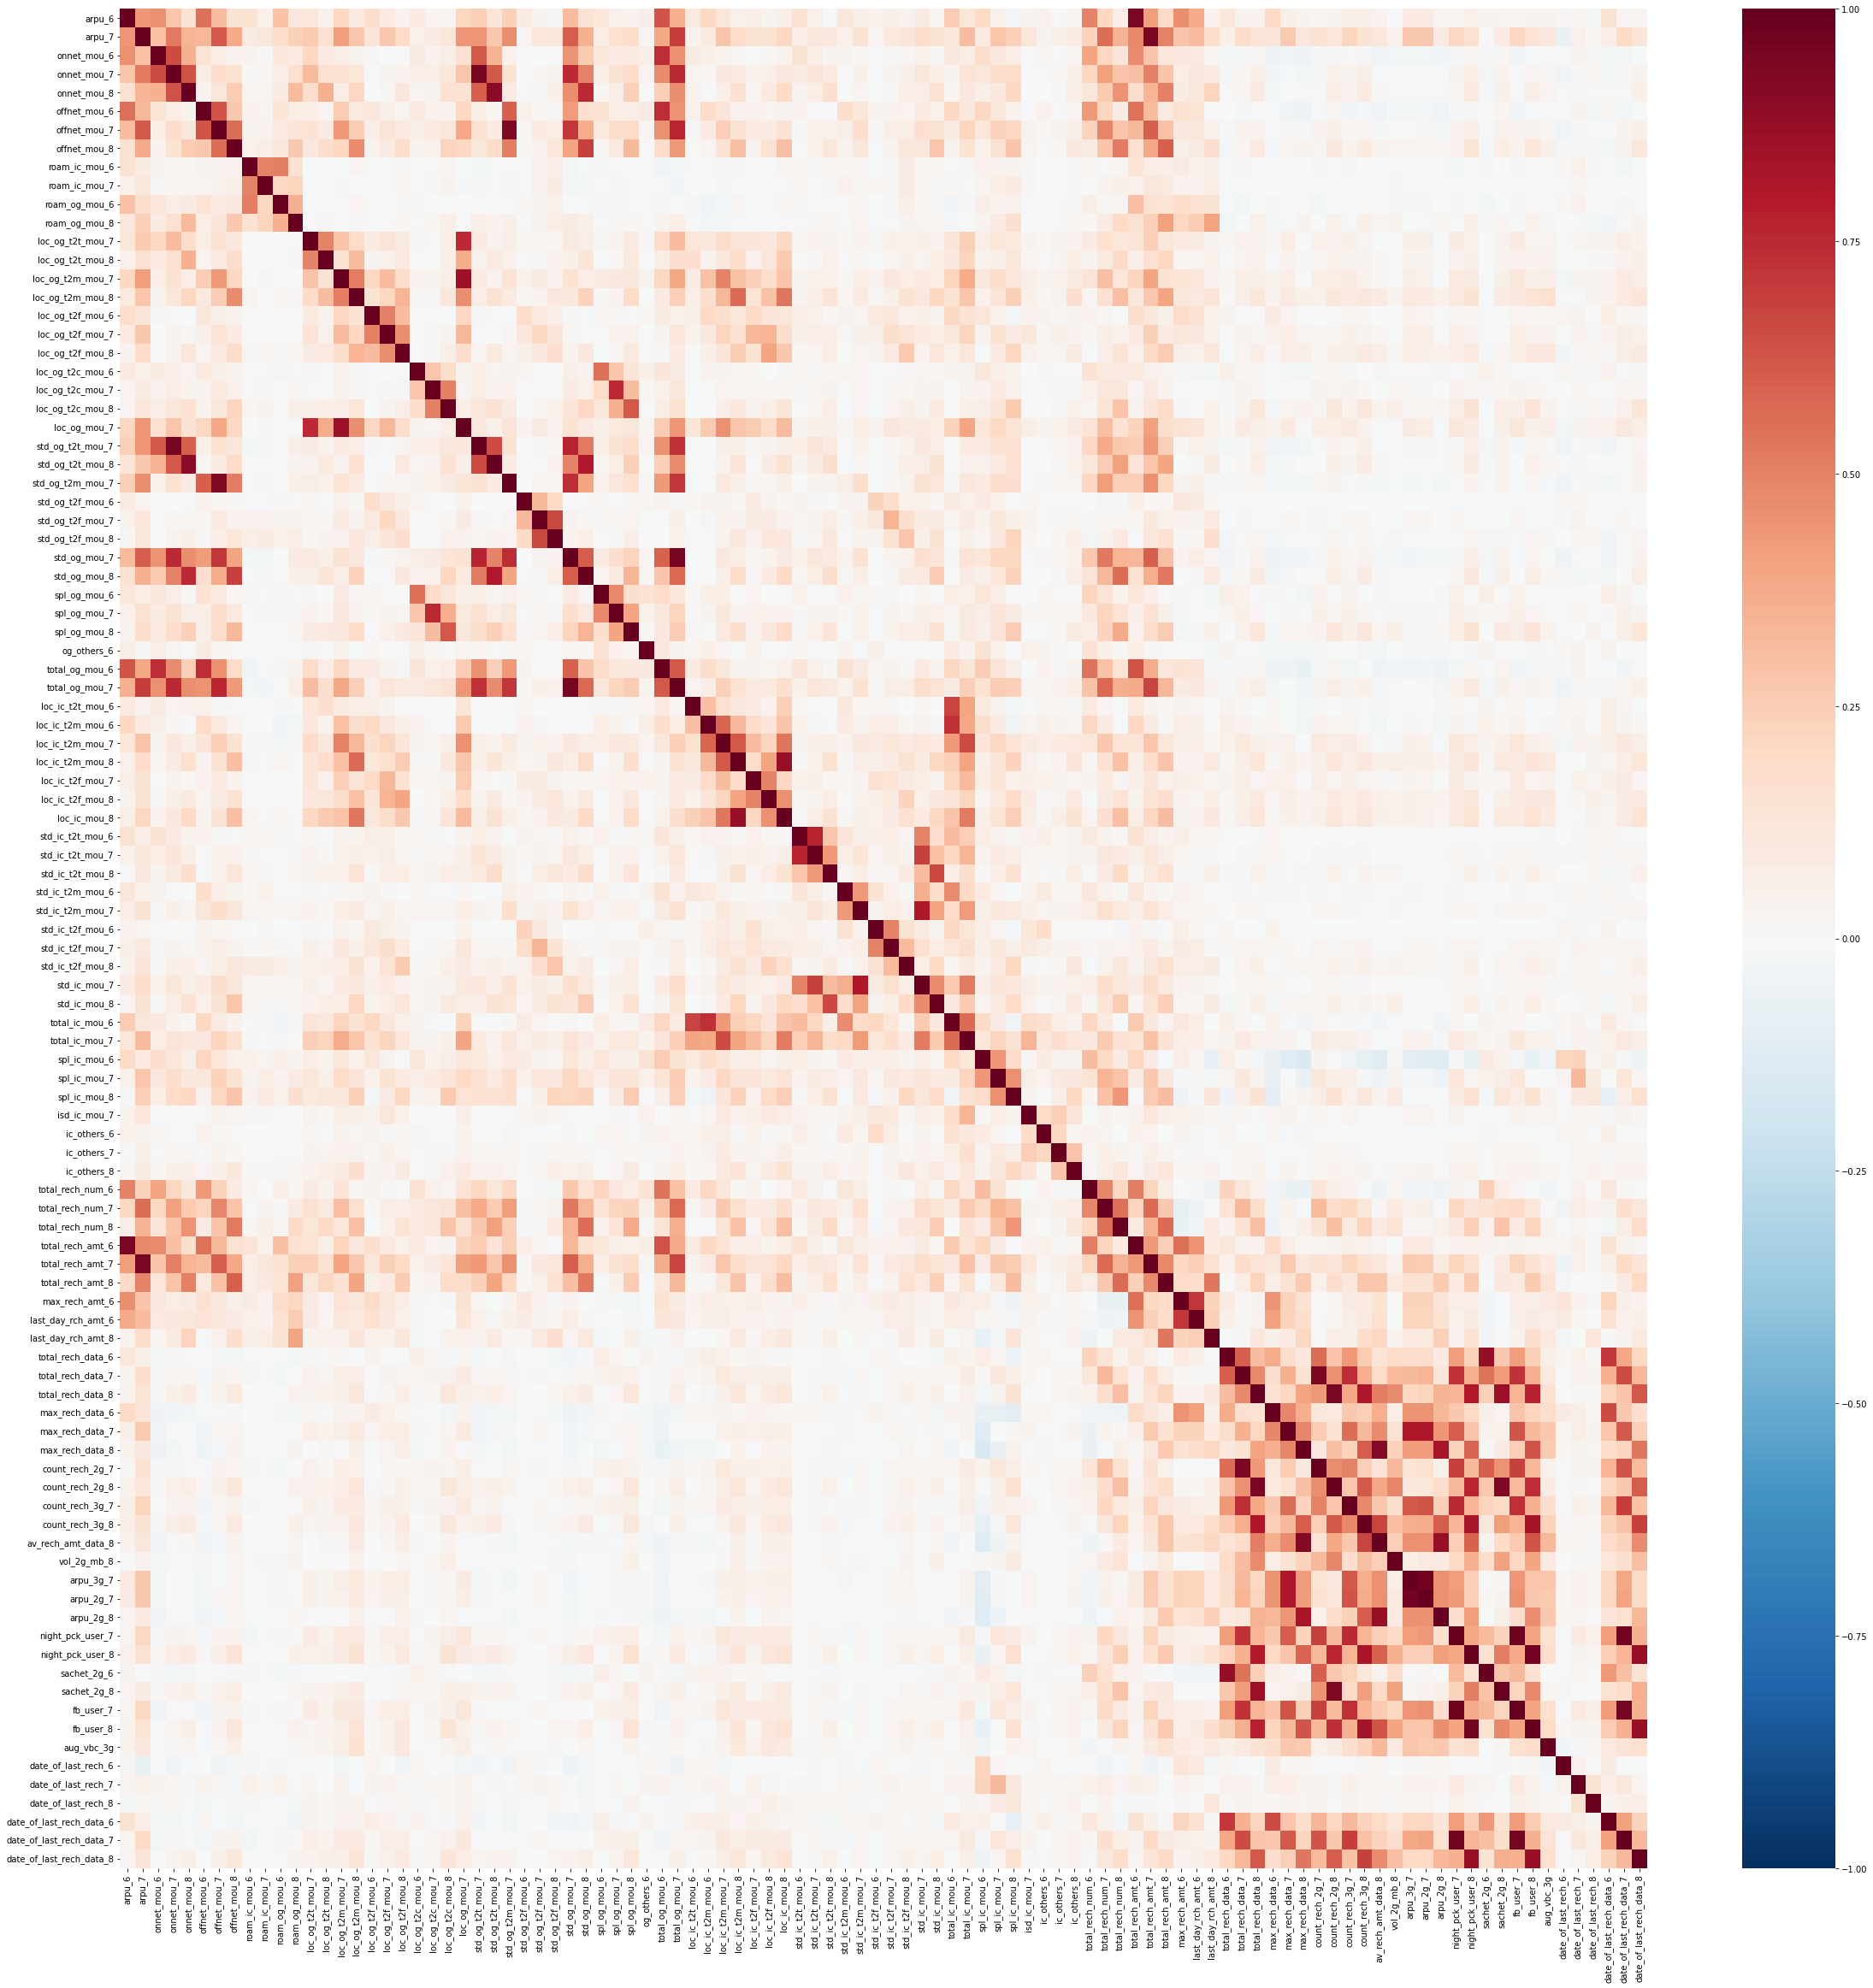

In [144]:
plt.figure(figsize=(40,40))
seaborn.heatmap(merged_train[merged_train['churn_probability']==1][selected100].corr(),fmt="f", cmap='RdBu_r', vmin=-1, vmax=1)

<AxesSubplot:>

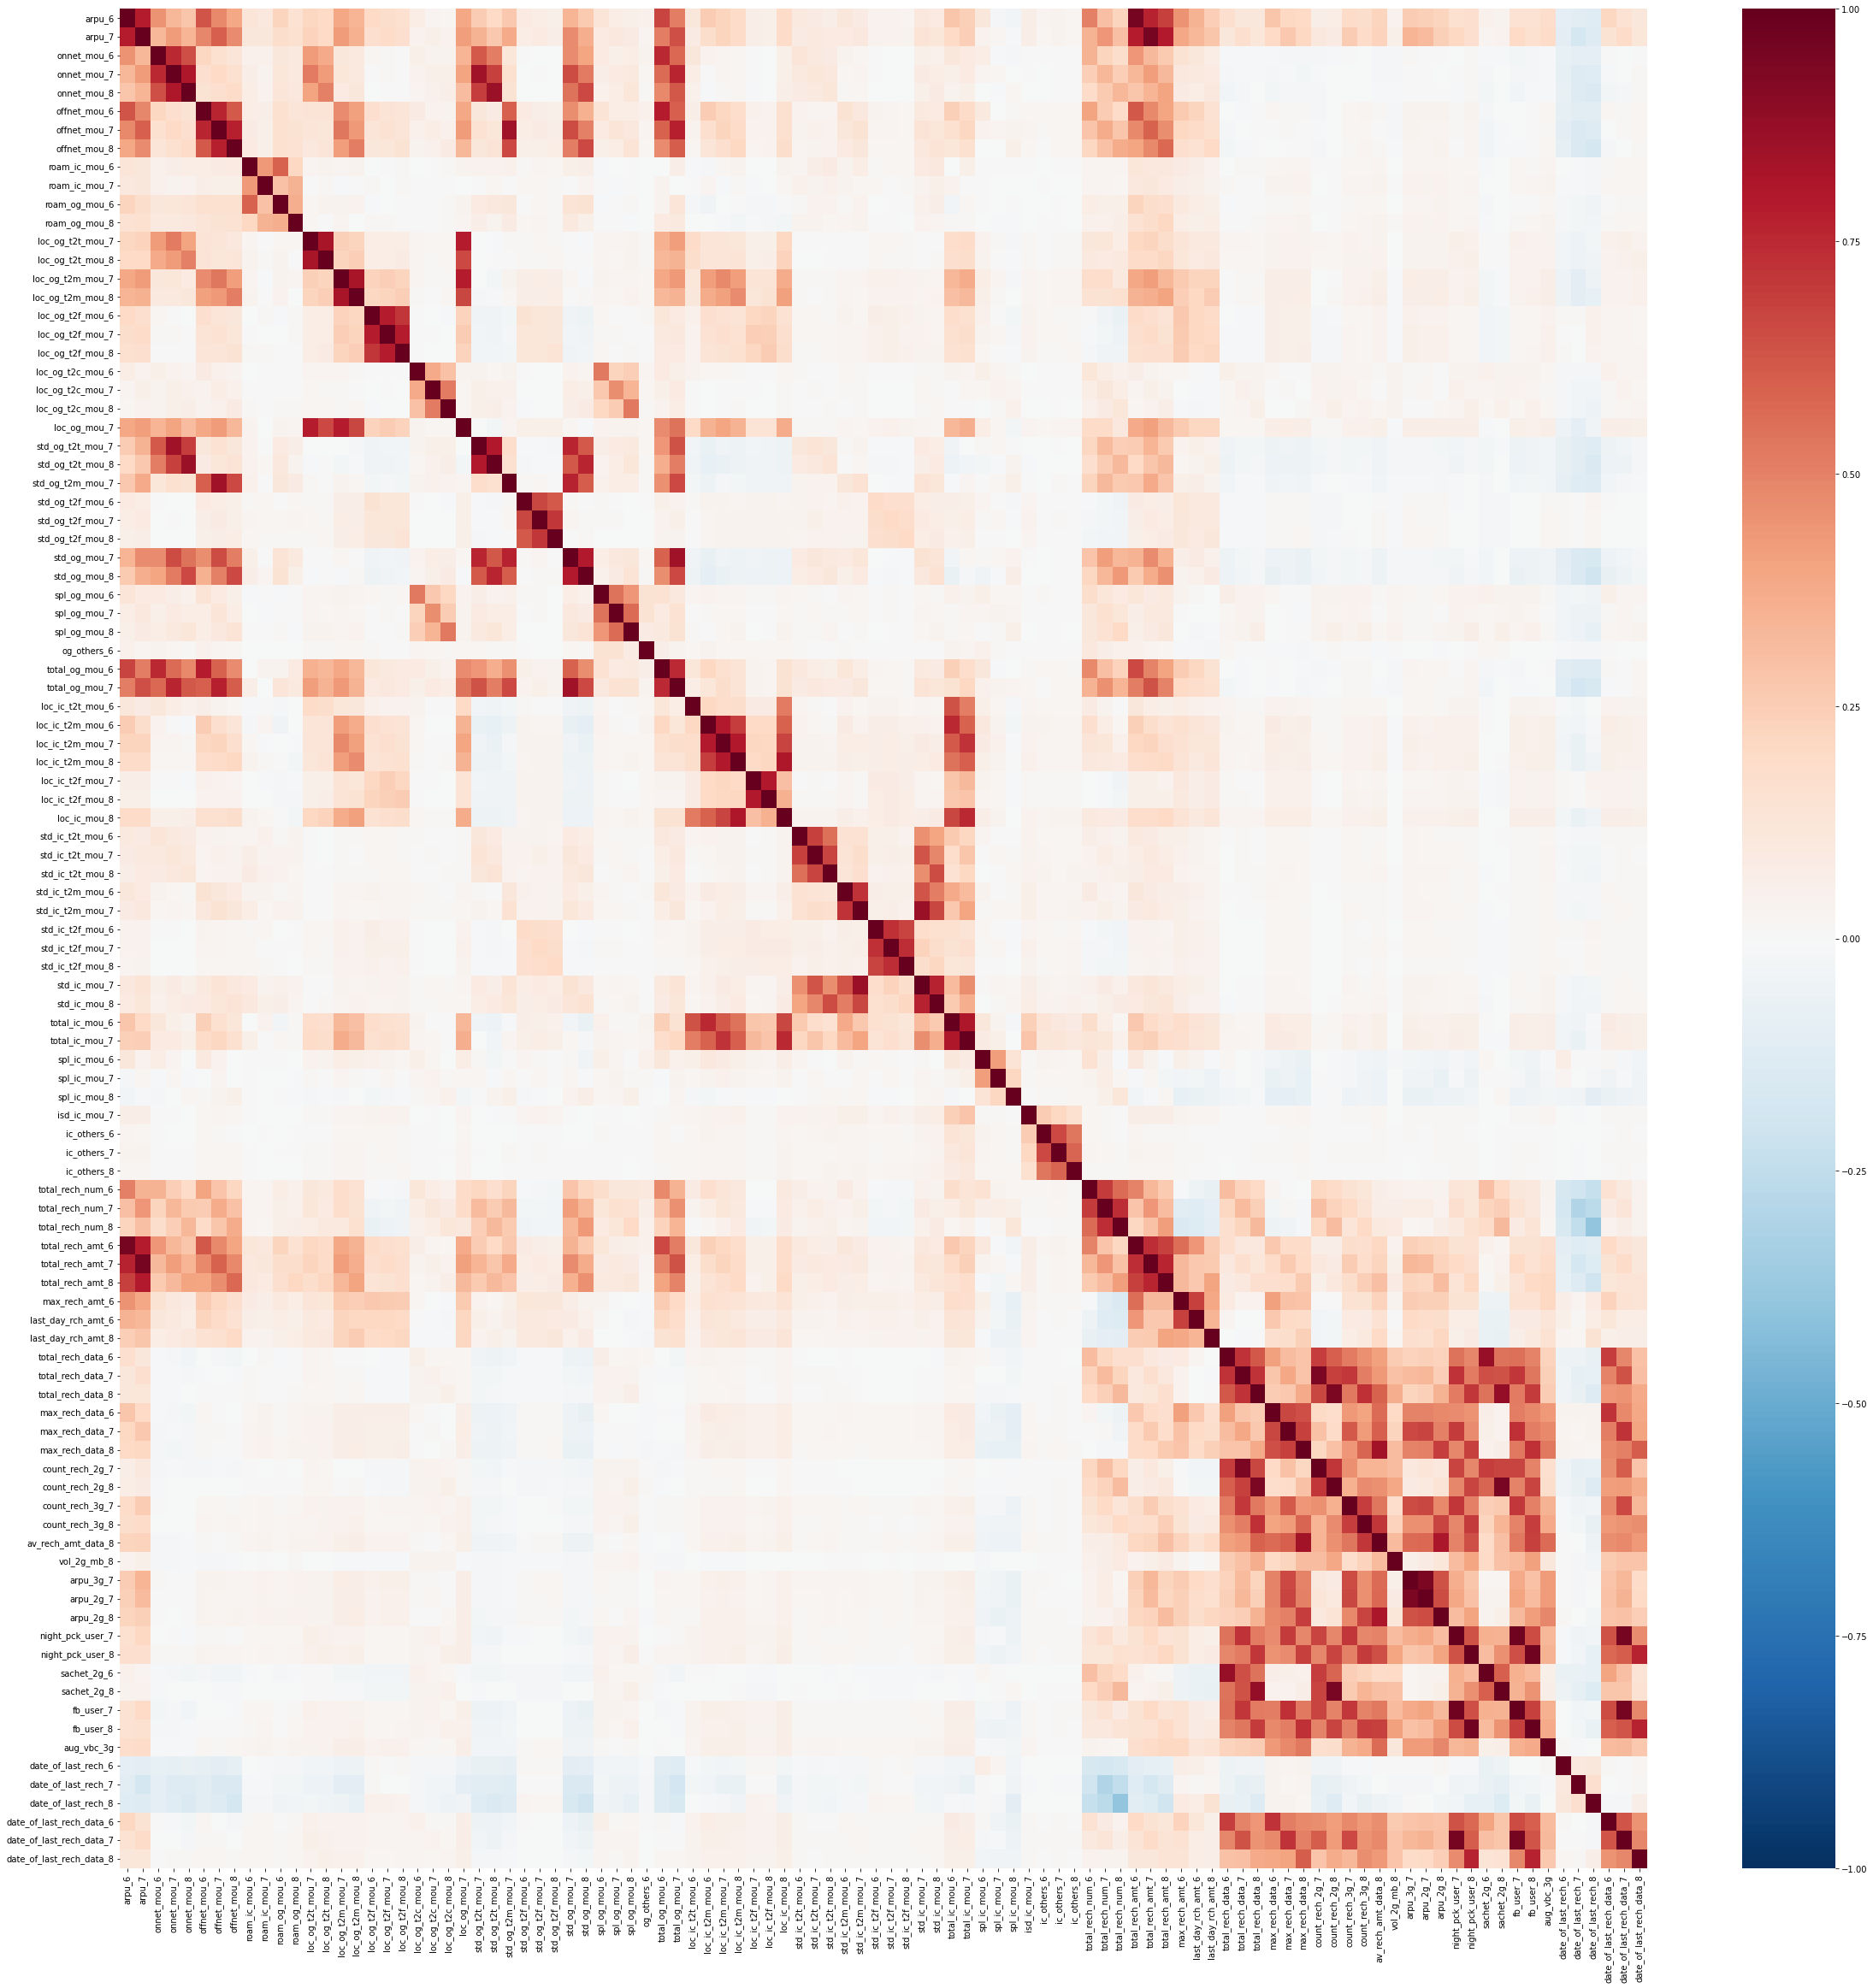

In [145]:
plt.figure(figsize=(40,40))
seaborn.heatmap(merged_train[merged_train['churn_probability']==0][selected100].corr(),fmt="f", cmap='RdBu_r', vmin=-1, vmax=1)

After analysizing the above heatmap for the churned and non churned customer following behaviour can be highlighted as an indicator 
of being churn or not 

- date of last recharge and average revenue/minutes of usage/total recharge in month feature seems to be neutralizing for the customer who has churned or in the risk of churning.

- the trend of recharge time and amount seems to reducing for the customer who has churned or in the risk of churn.

- incoming call trend is also showing negative relation between the first and the last month i.e 6 and 8 month in this case. so it can also be a siignificant indicator 
to identify the risk

- For the churning cutomer the std T2F minutes of usage seems to be be positively related.

- Intensity of the outgoing calls for the all categgory seems to be neutralizing towards 0 , which  can be the idicator of the churning customers.



#### Conclusion prediction from model with all best parameters

- lg_model , base model , accuracy-91.20 , remarks(increased accuracy due to imbalancedata)
- lg_model3, trained with 100 top features, accuracy-91.27, remarks(better prediction compartively using less featureset)
- lg_model4, trained with 20 top features at threshold 0.4, accuracy-92.95, remarks(better prediction compartively using less featureset)
- lg_model4, trained with 100 top features at threshold 0.4, accuracy-91.94, remarks(better prediction compartively using less featureset)
- rf_model1, trained with 100 top features at min_sample_split 100, accuracy-94.37, remarks(Better prediction of all logistic regresssion model)
- gs_cv.best_estimator_, hyper parameter tuned model , accuracy-94.23 , remarks (Best Model so far)
- lg_model5, logistic model with PCA , accuracy-90.42 at 0.3 threshold , remarks(not much difference than doing it witout dimensionality  reduction)
- xgb_model, implemented with XGBClassifier, accuracy-92.20, remarks(not much difference than doing it with normal algorithms)

In [173]:
# Now, we will try to predict the test case from the best one with 94.23% accuracy offered by random forest with 100 top feature from rfe
#  and see what it offers

In [179]:
sample_test=pd.read_csv("./test.csv/test.csv")
x_test_data=sample_test[selected100]
# gs_cv.best_estimator_.predict(sample_test)

In [180]:
x_test_data=x_test_data.fillna(-1)
x_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 100 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   arpu_6                    30000 non-null  float64
 1   arpu_7                    30000 non-null  float64
 2   onnet_mou_6               30000 non-null  float64
 3   onnet_mou_7               30000 non-null  float64
 4   onnet_mou_8               30000 non-null  float64
 5   offnet_mou_6              30000 non-null  float64
 6   offnet_mou_7              30000 non-null  float64
 7   offnet_mou_8              30000 non-null  float64
 8   roam_ic_mou_6             30000 non-null  float64
 9   roam_ic_mou_7             30000 non-null  float64
 10  roam_og_mou_6             30000 non-null  float64
 11  roam_og_mou_8             30000 non-null  float64
 12  loc_og_t2t_mou_7          30000 non-null  float64
 13  loc_og_t2t_mou_8          30000 non-null  float64
 14  loc_o

In [181]:
#now we will conver the data using the reference date that we have.
allDates_test=x_test_data.select_dtypes(include='object')
for i in allDates_test.columns:
    x_test_data[i]=x_test_data[i].apply(lambda x : (dateRef-datetime.datetime.strptime(x,'%m/%d/%Y')).days if isinstance(x,str) else x)

In [182]:
sample_predicted=gs_cv.best_estimator_.predict(x_test_data)

In [183]:
resultset=pd.concat([sample_test['id'],pd.DataFrame(sample_predicted,columns=['churn_probability'])],axis=1)

In [188]:
resultset.to_csv("./Submission.csv",index=False)